In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load time series data into Pandas
Billboard_top_100 = pd.read_csv('/Users/Uday/projects/Project-1-group-2/billboard.csv')
# Rename Current Week to Rank
Billboard_top_100.rename(columns={'current_week': 'rank'}, inplace=True)
Billboard_top_100.head()

,chart_week,rank,title,performer,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,time_signature,duration_ms,genres
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.164,0.0708,150.273,0.350,4,241107,"['dance pop', 'pop', 'urban contemporary']"
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,0.598,0.470,-8.744,0.0496,0.617,0.5050,67.086,0.879,4,126267,"['adult standards', 'lounge', 'rockabilly']"
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,0.754,0.424,-8.463,0.0363,0.643,0.0652,119.705,0.806,4,130973,[]
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,0.682,0.375,-13.056,0.0303,0.579,0.0760,140.453,0.888,4,135533,"['adult standards', 'american folk revival']"
4,2022-01-01,5,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.578,0.1330,141.981,0.130,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']"


In [3]:
Billboard_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chart_week      1360 non-null   object 
 1   rank            1360 non-null   int64  
 2   title           1360 non-null   object 
 3   performer       1360 non-null   object 
 4   danceability    1360 non-null   float64
 5   energy          1360 non-null   float64
 6   loudness        1360 non-null   float64
 7   speechiness     1360 non-null   float64
 8   acousticness    1360 non-null   float64
 9   liveness        1360 non-null   float64
 10  tempo           1360 non-null   float64
 11  valence         1360 non-null   float64
 12  time_signature  1360 non-null   int64  
 13  duration_ms     1360 non-null   int64  
 14  genres          1360 non-null   object 
dtypes: float64(8), int64(3), object(4)
memory usage: 159.5+ KB


In [4]:
Billboard_top_100['week_date'] = pd.to_datetime(Billboard_top_100['chart_week'])
Billboard_top_100['month'] = Billboard_top_100['week_date'].dt.month
Billboard_top_100['year'] = Billboard_top_100['week_date'].dt.year
# creating a combined 'month_year' column
Billboard_top_100['month_year'] = Billboard_top_100['week_date'].dt.to_period('M')

In [5]:
Billboard_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   chart_week      1360 non-null   object        
 1   rank            1360 non-null   int64         
 2   title           1360 non-null   object        
 3   performer       1360 non-null   object        
 4   danceability    1360 non-null   float64       
 5   energy          1360 non-null   float64       
 6   loudness        1360 non-null   float64       
 7   speechiness     1360 non-null   float64       
 8   acousticness    1360 non-null   float64       
 9   liveness        1360 non-null   float64       
 10  tempo           1360 non-null   float64       
 11  valence         1360 non-null   float64       
 12  time_signature  1360 non-null   int64         
 13  duration_ms     1360 non-null   int64         
 14  genres          1360 non-null   object        
 15  week

In [6]:
Billboard_top_100.head(10)

,chart_week,rank,title,performer,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,time_signature,duration_ms,genres,week_date,month,year,month_year
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.1640,0.0708,150.273,0.350,4,241107,"['dance pop', 'pop', 'urban contemporary']",2022-01-01,1,2022,2022-01
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,0.598,0.470,-8.744,0.0496,0.6170,0.5050,67.086,0.879,4,126267,"['adult standards', 'lounge', 'rockabilly']",2022-01-01,1,2022,2022-01
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,0.754,0.424,-8.463,0.0363,0.6430,0.0652,119.705,0.806,4,130973,[],2022-01-01,1,2022,2022-01
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,0.682,0.375,-13.056,0.0303,0.5790,0.0760,140.453,0.888,4,135533,"['adult standards', 'american folk revival']",2022-01-01,1,2022,2022-01
4,2022-01-01,5,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.5780,0.1330,141.981,0.130,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']",2022-01-01,1,2022,2022-01
5,2022-01-01,6,It's The Most Wonderful Time Of The Year,Andy Williams,0.240,0.598,-8.435,0.0369,0.7660,0.1170,201.629,0.776,3,151933,"['adult standards', 'easy listening']",2022-01-01,1,2022,2022-01
6,2022-01-01,7,Last Christmas,Wham!,0.735,0.478,-12.472,0.0293,0.1890,0.3550,107.682,0.947,4,262960,"['new romantic', 'new wave', 'new wave pop', '...",2022-01-01,1,2022,2022-01
7,2022-01-01,8,Feliz Navidad,Jose Feliciano,0.513,0.831,-9.004,0.0383,0.5500,0.3360,148.837,0.963,4,182067,"['latin pop', 'puerto rican pop']",2022-01-01,1,2022,2022-01
8,2022-01-01,9,Stay,The Kid LAROI & Justin Bieber,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,0.478,4,141806,['australian hip hop'],2022-01-01,1,2022,2022-01
9,2022-01-01,10,Sleigh Ride,The Ronettes,0.529,0.772,-7.013,0.0287,0.4030,0.3160,91.751,0.853,4,181267,"['brill building pop', 'classic girl group', '...",2022-01-01,1,2022,2022-01


In [7]:
# Create rank groupings
# Define the bins and labels
bins = [0, 3, 7, 10]  # Define bin edges
labels = ['1-3', '4-6', '7-10']  # Define labels for the bins
# Create the new variable with bucketed values
Billboard_top_100['rank_bucket'] = pd.cut(Billboard_top_100['rank'], bins=bins, labels=labels, right=True)
Billboard_top_100.head()

,chart_week,rank,title,performer,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,time_signature,duration_ms,genres,week_date,month,year,month_year,rank_bucket
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.164,0.0708,150.273,0.350,4,241107,"['dance pop', 'pop', 'urban contemporary']",2022-01-01,1,2022,2022-01,1-3
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,0.598,0.470,-8.744,0.0496,0.617,0.5050,67.086,0.879,4,126267,"['adult standards', 'lounge', 'rockabilly']",2022-01-01,1,2022,2022-01,1-3
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,0.754,0.424,-8.463,0.0363,0.643,0.0652,119.705,0.806,4,130973,[],2022-01-01,1,2022,2022-01,1-3
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,0.682,0.375,-13.056,0.0303,0.579,0.0760,140.453,0.888,4,135533,"['adult standards', 'american folk revival']",2022-01-01,1,2022,2022-01,4-6
4,2022-01-01,5,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.578,0.1330,141.981,0.130,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']",2022-01-01,1,2022,2022-01,4-6


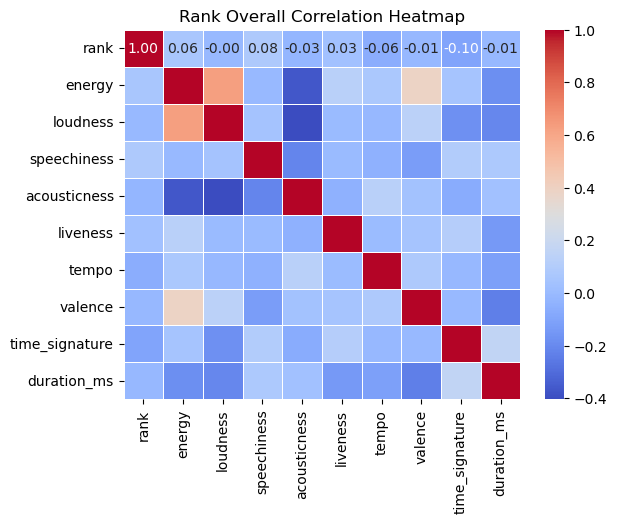

In [8]:
# Understand Relationships between Rank and Attributes
rank_corr_overall= Billboard_top_100[['rank','energy','loudness','speechiness','acousticness','liveness','tempo','valence','time_signature','duration_ms']].corr()
#plt.figure(figsize=(10, 8))  
sns.heatmap(rank_corr_overall, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Rank Overall Correlation Heatmap')
plt.show()

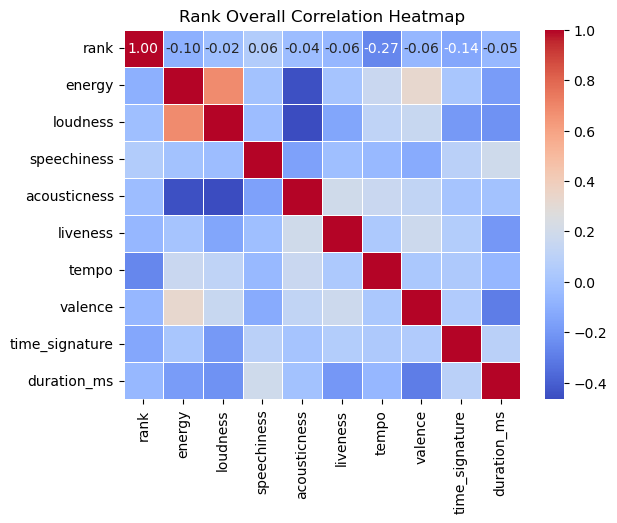

In [9]:
# Does Correlation change for the top 3 songs 
Billboard_top_3 = Billboard_top_100.loc[Billboard_top_100['rank_bucket'] =='1-3']
rank_corr_top3= Billboard_top_3[['rank','energy','loudness','speechiness','acousticness','liveness','tempo','valence','time_signature','duration_ms']].corr()
#plt.figure(figsize=(10, 8))  
sns.heatmap(rank_corr_top3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Rank Overall Correlation Heatmap')
plt.show()

In [10]:
#Observations "
#There is a relatively high negative correlation between enery/tempo and rank i.e. the top songs generally have high energy( as they have the lowest ranks)"
#While not highly correlated , top ranked songs are generally high in positivity( identified by the negative corelation with valence= positivity)'
#and lower in speechiness (positive correlation i.e. the lower the rank the lesser the speechiness)"

In [11]:
# Are certain artists showing up more on the lists compared to others for the top 3 songs?
artist_song_counts = Billboard_top_3['performer'].value_counts()
artist_song_counts

performer
Harry Styles                    30
Taylor Swift                    30
Jack Harlow                     27
Morgan Wallen                   26
SZA                             24
                                ..
Travis Scott Featuring Drake     1
Jung Kook Featuring Latto        1
PinkPantheress & Ice Spice       1
The Weeknd & Ariana Grande       1
Jimin                            1
Name: count, Length: 64, dtype: int64

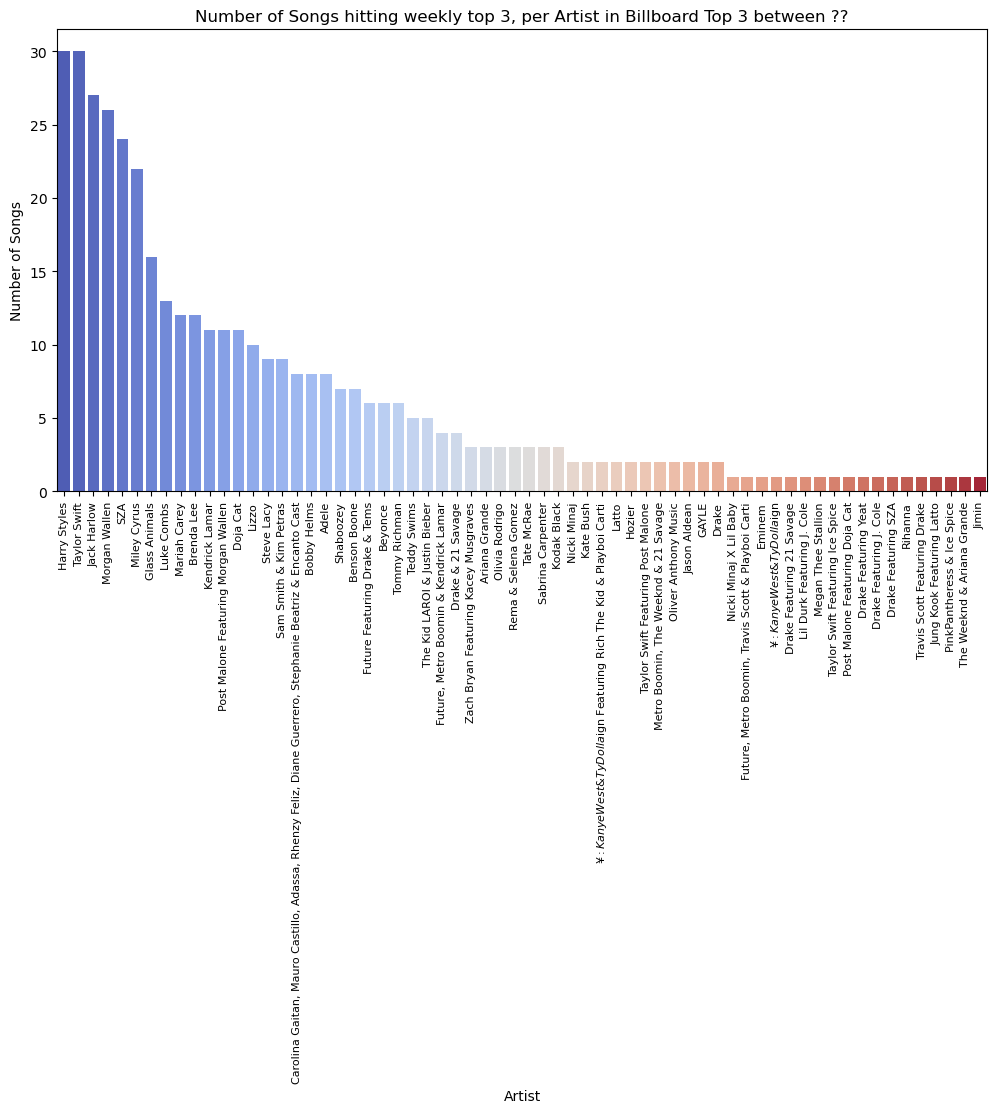

In [12]:
# Are certain artists showing up more on the lists compared to others for the top 3 songs?
artist_song_counts = Billboard_top_3['performer'].value_counts()
artist_song_counts
# Convert to DataFrame for easier manipulation
artist_song_counts_df = artist_song_counts.reset_index()
artist_song_counts_df.columns = ['artist', 'number_of_songs']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='artist', y='number_of_songs', data=artist_song_counts_df, palette='coolwarm')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs hitting weekly top 3, per Artist in Billboard Top 3 between ??')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [13]:
# get the min and max values of the highly correlated values for top 3 songs 
min_values = Billboard_top_3.min(numeric_only=True)
max_values = Billboard_top_3.max(numeric_only=True)
# Creating a DataFrame 
winning_matrix_ranges = pd.DataFrame({
    'Variable': min_values.index,
    'Min Value': min_values.values,
    'Max Value': max_values.values
})
winning_matrix_ranges

,Variable,Min Value,Max Value
0,rank,1.000000,3.000
1,danceability,0.247000,0.950
2,energy,0.264000,0.891
3,loudness,-13.187000,-2.653
4,speechiness,0.026200,0.423
5,acousticness,0.000307,0.899
6,liveness,0.023200,0.505
7,tempo,67.086000,205.863
8,valence,0.038400,0.934
9,time_signature,1.000000,4.000


In [14]:
# get the min and max values of the highly correlated values for top 100 songs 
min_values_100 = Billboard_top_100.min(numeric_only=True)
max_values_100 = Billboard_top_100.max(numeric_only=True)
# Creating a DataFrame 
winning_matrix_ranges_100 = pd.DataFrame({
    'Variable': min_values_100.index,
    'Min Value': min_values_100.values,
    'Max Value': max_values_100.values
})
winning_matrix_ranges_100

,Variable,Min Value,Max Value
0,rank,1.000000,10.000
1,danceability,0.240000,0.950
2,energy,0.192000,0.965
3,loudness,-27.771000,-2.653
4,speechiness,0.025500,0.643
5,acousticness,0.000307,0.920
6,liveness,0.023200,0.730
7,tempo,67.086000,205.863
8,valence,0.038400,0.963
9,time_signature,1.000000,5.000


In [15]:
#Create a 'Mood Factor using the most correlating variables 
def calculate_mood(row):
    return (row['energy'] * 0.5) + (row['valence'] * 0.5) 

# Apply the custom function
Billboard_top_100['mood'] = Billboard_top_100.apply(calculate_mood, axis=1)

Billboard_top_100.head(10)

,chart_week,rank,title,performer,danceability,energy,loudness,speechiness,acousticness,liveness,...,valence,time_signature,duration_ms,genres,week_date,month,year,month_year,rank_bucket,mood
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.1640,0.0708,...,0.350,4,241107,"['dance pop', 'pop', 'urban contemporary']",2022-01-01,1,2022,2022-01,1-3,0.4885
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,0.598,0.470,-8.744,0.0496,0.6170,0.5050,...,0.879,4,126267,"['adult standards', 'lounge', 'rockabilly']",2022-01-01,1,2022,2022-01,1-3,0.6745
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,0.754,0.424,-8.463,0.0363,0.6430,0.0652,...,0.806,4,130973,[],2022-01-01,1,2022,2022-01,1-3,0.6150
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,0.682,0.375,-13.056,0.0303,0.5790,0.0760,...,0.888,4,135533,"['adult standards', 'american folk revival']",2022-01-01,1,2022,2022-01,4-6,0.6315
4,2022-01-01,5,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.5780,0.1330,...,0.130,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']",2022-01-01,1,2022,2022-01,4-6,0.2480
5,2022-01-01,6,It's The Most Wonderful Time Of The Year,Andy Williams,0.240,0.598,-8.435,0.0369,0.7660,0.1170,...,0.776,3,151933,"['adult standards', 'easy listening']",2022-01-01,1,2022,2022-01,4-6,0.6870
6,2022-01-01,7,Last Christmas,Wham!,0.735,0.478,-12.472,0.0293,0.1890,0.3550,...,0.947,4,262960,"['new romantic', 'new wave', 'new wave pop', '...",2022-01-01,1,2022,2022-01,4-6,0.7125
7,2022-01-01,8,Feliz Navidad,Jose Feliciano,0.513,0.831,-9.004,0.0383,0.5500,0.3360,...,0.963,4,182067,"['latin pop', 'puerto rican pop']",2022-01-01,1,2022,2022-01,7-10,0.8970
8,2022-01-01,9,Stay,The Kid LAROI & Justin Bieber,0.591,0.764,-5.484,0.0483,0.0383,0.1030,...,0.478,4,141806,['australian hip hop'],2022-01-01,1,2022,2022-01,7-10,0.6210
9,2022-01-01,10,Sleigh Ride,The Ronettes,0.529,0.772,-7.013,0.0287,0.4030,0.3160,...,0.853,4,181267,"['brill building pop', 'classic girl group', '...",2022-01-01,1,2022,2022-01,7-10,0.8125


In [20]:
Billboard_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   chart_week      1360 non-null   object        
 1   rank            1360 non-null   int64         
 2   title           1360 non-null   object        
 3   performer       1360 non-null   object        
 4   danceability    1360 non-null   float64       
 5   energy          1360 non-null   float64       
 6   loudness        1360 non-null   float64       
 7   speechiness     1360 non-null   float64       
 8   acousticness    1360 non-null   float64       
 9   liveness        1360 non-null   float64       
 10  tempo           1360 non-null   float64       
 11  valence         1360 non-null   float64       
 12  time_signature  1360 non-null   int64         
 13  duration_ms     1360 non-null   int64         
 14  genres          1360 non-null   object        
 15  week

In [51]:
# mean mood rating by month in a year 
Billboard_weekly_mood =Billboard_top_100[['month_year','mood']]
Billboard_monthly_mood = Billboard_weekly_mood.groupby('month_year').mean()
Billboard_monthly_mood.head(10)

,mood
month_year,
2022-01,0.586000
2022-02,0.523175
2022-03,0.566113
2022-04,0.595320
2022-05,0.603413
2022-06,0.578300
2022-07,0.572054
2022-08,0.632225
2022-09,0.684338


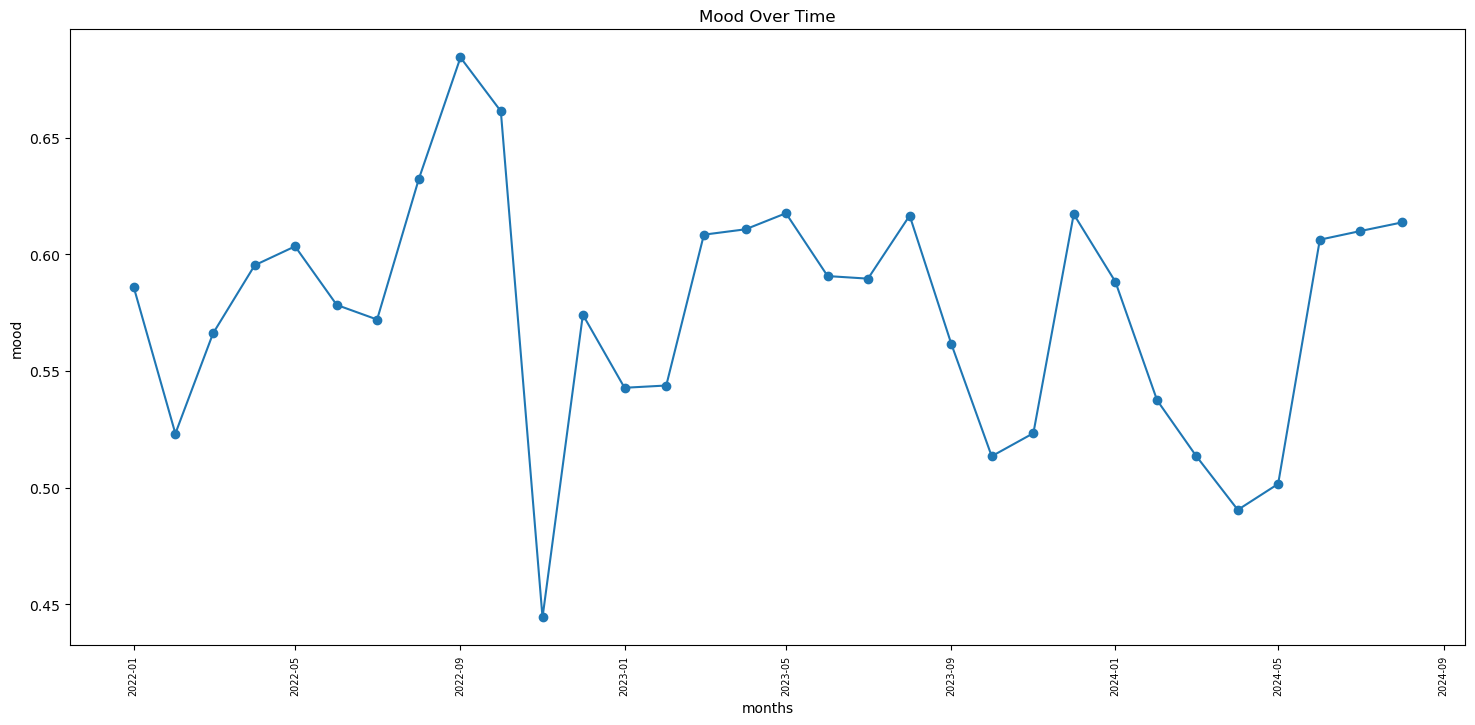

In [54]:
# Plot the mood of the top 100 songs over time 
# Calculate weekly averagean()
plt.figure(figsize=(18, 8))
plt.plot(Billboard_monthly_mood.index.to_timestamp(), Billboard_monthly_mood['mood'], marker='o')
plt.xlabel('months')
plt.ylabel('mood')
plt.title('Mood Over Time')
plt.grid(False)
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [41]:
# Import Events Timeline 
events = pd.read_csv('/Users/Uday/projects/Project-1-group-2/events_data.csv')
events = events.rename(columns ={'Unnamed: 0' : 'date'})
events.head()

,date,Event,Category
0,2022-01-27,The Northeast experiences a major blizzard whi...,Weather
1,2022-02-01,February 2022 North American winter storm: A m...,Weather
2,2022-02-03,"The share price of Meta falls by 26.4%, with F...",Economic
3,2022-02-24,"President Biden announces new, stronger sancti...",Political
4,2022-02-26,President Biden signs an order to provide $600...,Political


In [43]:

# Create a month_year column for events 
events['event_date'] = pd.to_datetime(events['date'])
events['month'] = events['event_date'].dt.month
events['year'] = events['event_date'].dt.year
# creating a combined 'month_year' column
events['month_year'] = events['event_date'].dt.to_period('M')
events.head()

,date,Event,Category,event_date,month,year,month_year
0,2022-01-27,The Northeast experiences a major blizzard whi...,Weather,2022-01-27,1,2022,2022-01
1,2022-02-01,February 2022 North American winter storm: A m...,Weather,2022-02-01,2,2022,2022-02
2,2022-02-03,"The share price of Meta falls by 26.4%, with F...",Economic,2022-02-03,2,2022,2022-02
3,2022-02-24,"President Biden announces new, stronger sancti...",Political,2022-02-24,2,2022,2022-02
4,2022-02-26,President Biden signs an order to provide $600...,Political,2022-02-26,2,2022,2022-02


In [44]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        135 non-null    object        
 1   Event       135 non-null    object        
 2   Category    135 non-null    object        
 3   event_date  135 non-null    datetime64[ns]
 4   month       135 non-null    int32         
 5   year        135 non-null    int32         
 6   month_year  135 non-null    period[M]     
dtypes: datetime64[ns](1), int32(2), object(3), period[M](1)
memory usage: 6.5+ KB


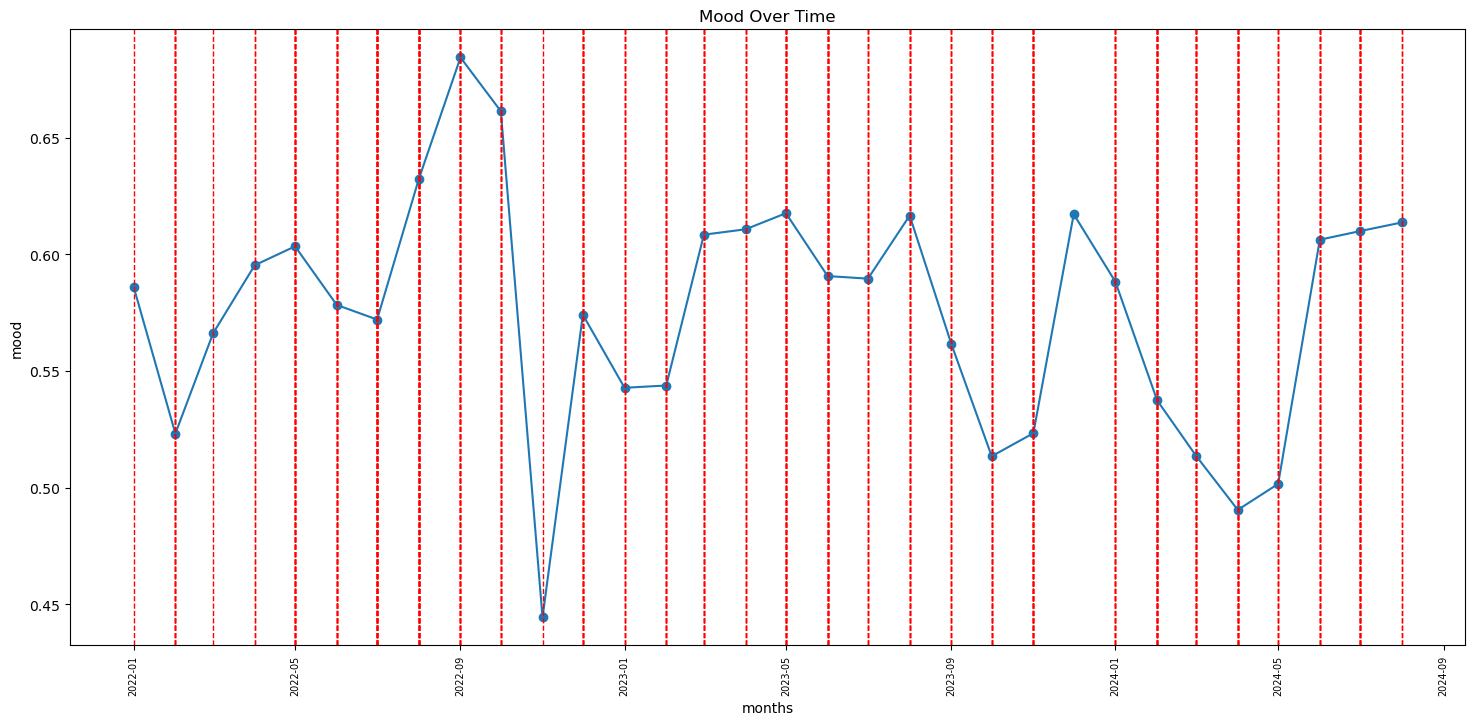

In [58]:
plt.figure(figsize=(18, 8))
plt.plot(Billboard_monthly_mood.index.to_timestamp(), Billboard_monthly_mood['mood'], marker='o')


for index, row in events.iterrows():
    plt.axvline(x=row['month_year'].to_timestamp(), color='r', linestyle='--', linewidth=1, label=row['Event'])

plt.xlabel('months')
plt.ylabel('mood')
plt.title('Mood Over Time')
plt.grid(False)
plt.xticks(rotation=90, fontsize=7)
plt.show()

NameError: name 'mdates' is not defined

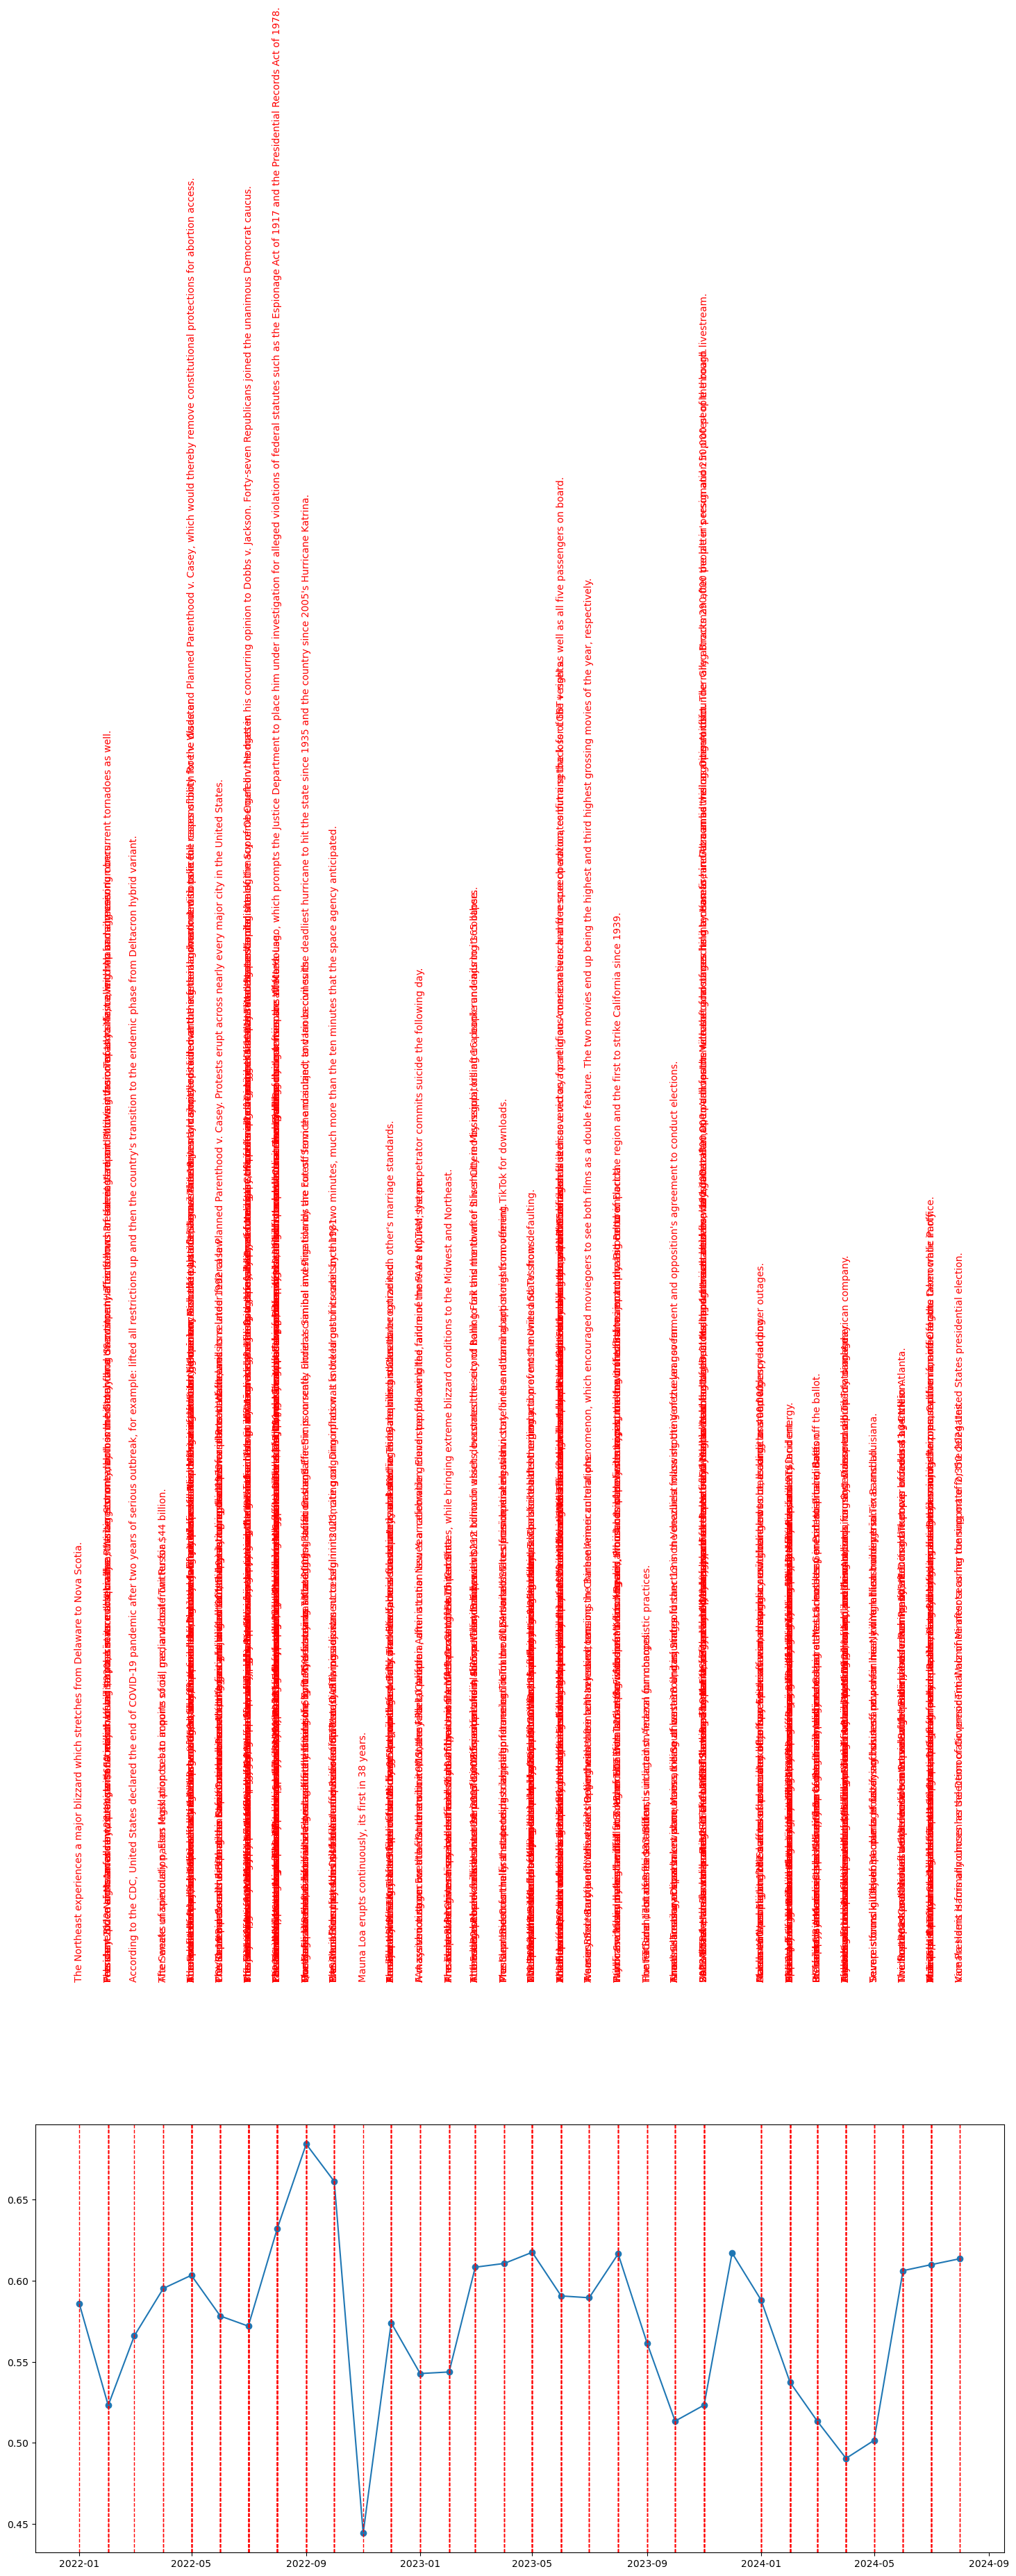

In [59]:
plt.figure(figsize=(18, 8))
plt.plot(Billboard_monthly_mood.index.to_timestamp(), Billboard_monthly_mood['mood'], marker='o')

for index, row in events.iterrows():
    # Add vertical line
    plt.axvline(x=row['month_year'].to_timestamp(), color='r', linestyle='--', linewidth=1)
    
    # Add event label with offset to avoid overlap
    plt.text(row['month_year'].to_timestamp(), Billboard_monthly_mood['mood'].max() + 0.1, row['Event'],
             rotation=90, color='r', ha='center', va='bottom', fontsize=10)

# Format x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Months')
plt.ylabel('Mood')
plt.title('Mood Over Time')
plt.grid(False)
plt.xticks(rotation=90, fontsize=7)
plt.legend()
plt.tight_layout()
plt.show()